# **PROBLEMA DE NEGOCIO**


---

### DataHouse somos una empresa de tecnología dedicada al rubro de los inmuebles, por medio de nuestros equipos tecnologicos realizamos análisis para empresas dedicadas a bienes raises con el fin de optimizar el performance de las inversion de estos para poder ofrecer ellos en la carterela de servicios un mejor precio a sus clientes según la espectatica de ellos, tenemos presencia en muchos paises de Latam y buscamos crecer para mejorar tanto la experiencia de la compra de tu casa como de tu negocio en bienes y raises buscando optener nuevas aliansas que nos permitan crecer y llegar a mas parte de todos nuestros hermanos latinoamiricanos

# **1. Configuración del Ambiente**


---

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Obtención y Tratamiento de Datos**


---


## **2.1 Cargando las bases de datos**

In [2]:
# Leer el archivo CSV comprimido
df_usa = pd.read_csv('../data/Data_Final_realE_USA.csv')
df_usa.head(10)

,Unnamed: 0,price,bed,bath,size(feet),state
0,0,105000.0,3.0,2.0,920.0,Puerto Rico
1,1,80000.0,4.0,2.0,1527.0,Puerto Rico
2,2,67000.0,2.0,1.0,748.0,Puerto Rico
3,3,145000.0,4.0,2.0,1800.0,Puerto Rico
4,4,65000.0,6.0,2.0,NaN,Puerto Rico
5,5,179000.0,4.0,3.0,2520.0,Puerto Rico
6,6,50000.0,3.0,1.0,2040.0,Puerto Rico
7,7,71600.0,3.0,2.0,1050.0,Puerto Rico
8,8,100000.0,2.0,1.0,1092.0,Puerto Rico
9,9,300000.0,5.0,3.0,5403.0,Puerto Rico


In [3]:
df_usa['id'] = df_usa['Unnamed: 0']
df_usa = df_usa.drop(columns=['Unnamed: 0'])

## **2.2 Tratamiento de datos**

In [4]:
df_usa['state'].value_counts()

state
Florida                 161216
Texas                   122172
California              101034
New York                 71378
North Carolina           57129
Illinois                 53194
Georgia                  51517
Pennsylvania             46878
Arizona                  37657
Ohio                     36660
Tennessee                36509
Virginia                 35572
Michigan                 34786
New Jersey               33400
South Carolina           30533
Missouri                 30057
Colorado                 26911
Alabama                  26486
Washington               25210
Minnesota                24541
Wisconsin                24313
Louisiana                23013
Oregon                   20398
Maryland                 20349
Arkansas                 19013
Kentucky                 18615
Oklahoma                 18475
Indiana                  18279
Mississippi              14894
Connecticut              13940
Iowa                     13875
Utah                     13817
Ne

In [5]:
df_usa.sample(10)

,price,bed,bath,size(feet),state,id
850391,440961.0,4.0,3.0,2907.0,Illinois,850391
1257011,2600000.0,3.0,1.0,1000.0,California,1257011
599848,120000.0,NaN,NaN,NaN,Alabama,599848
229386,1495000.0,3.0,2.0,2176.0,Maryland,229386
427546,1600000.0,NaN,NaN,NaN,Florida,427546
1149791,510000.0,3.0,3.0,1998.0,Idaho,1149791
827497,3000000.0,NaN,NaN,NaN,South Dakota,827497
686704,418000.0,NaN,NaN,NaN,Ohio,686704
721978,145000.0,3.0,2.0,2916.0,Indiana,721978
1179104,409900.0,3.0,3.0,1862.0,Arizona,1179104


In [6]:
print(df_usa.info())
print('-------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391306 entries, 0 to 1391305
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1389774 non-null  float64
 1   bed         979905 non-null   float64
 2   bath        982530 non-null   float64
 3   size(feet)  925535 non-null   float64
 4   state       1391304 non-null  object 
 5   id          1391306 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 63.7+ MB
None
-------------


In [7]:
def verificacion(dataframe):
  global df_usa
    # Verificar valores nulos
  print("Valores nulos por columna:")
  print(dataframe.isnull().sum())
  print("\n")

  # Verificar duplicados
  duplicados = dataframe.duplicated()
  df_duplicados = dataframe[duplicados]
  if not df_duplicados.empty:
      print("Filas duplicadas:")
      print(df_duplicados)
      print("\n")

  # Contar valores únicos en cada columna
  print("Conteo de valores únicos por columna:")
  for columna in dataframe.columns:
      print(f"Columna '{columna}': {dataframe[columna].nunique()} valores únicos")
      print(f"Valores únicos en '{columna}':")
      #print(dataframe[columna].unique())
      print("\n")

  # Verificar tipos de datos por columna
  print("\nTipos de datos por columna:")
  for columna in dataframe.columns:
      print(f"Columna '{columna}': {dataframe[columna].dtype}")

  # Verificar tipos de datos y buscar inconsistencias
  for columna in dataframe.select_dtypes(include=['object', 'string']).columns:
      print(f"\nVerificando inconsistencias en la columna '{columna}':")
      inconsistencias = dataframe[dataframe[columna].apply(lambda x: not all(ord(c) < 128 for c in str(x)))]
      if not inconsistencias.empty:
          print(inconsistencias)
          print("\n")

  #Verificar Nan en todo el dataset
  print("Valores NaN por columna:")
  df_nan = dataframe[dataframe.isna().any(axis=1)]
  print(df_nan.head())
  print("\n")

In [8]:
def limpiar_datos(df):
    # Eliminar datos duplicados
    df = df.drop_duplicates()
    
    # Eliminar filas con valores nulos
    df = df.dropna()
    
    return df


### **2.2.1 USA**

In [9]:
verificacion(df_usa)

Valores nulos por columna:
price           1532
bed           411401
bath          408776
size(feet)    465771
state              2
id                 0
dtype: int64


Conteo de valores únicos por columna:
Columna 'price': 82818 valores únicos
Valores únicos en 'price':


Columna 'bed': 97 valores únicos
Valores únicos en 'bed':


Columna 'bath': 85 valores únicos
Valores únicos en 'bath':


Columna 'size(feet)': 11523 valores únicos
Valores únicos en 'size(feet)':


Columna 'state': 56 valores únicos
Valores únicos en 'state':


Columna 'id': 1391306 valores únicos
Valores únicos en 'id':



Tipos de datos por columna:
Columna 'price': float64
Columna 'bed': float64
Columna 'bath': float64
Columna 'size(feet)': float64
Columna 'state': object
Columna 'id': int64

Verificando inconsistencias en la columna 'state':
Valores NaN por columna:
       price  bed  bath  size(feet)        state  id
4    65000.0  6.0   2.0         NaN  Puerto Rico   4
42  400000.0  NaN   NaN     43082.0  Puerto

In [10]:
# Estadísticas descriptivas
print(df_usa.describe())

              price            bed           bath    size(feet)            id
count  1.389774e+06  979905.000000  982530.000000  9.255350e+05  1.391306e+06
mean   5.476799e+05       3.332009       2.572548  3.340764e+03  6.956525e+05
std    2.637942e+06       1.750876       1.938299  1.081637e+06  4.016356e+05
min    0.000000e+00       0.000000       0.000000  1.000000e+00  0.000000e+00
25%    1.350000e+05       3.000000       2.000000  1.324000e+03  3.478262e+05
50%    3.050000e+05       3.000000       2.000000  1.806000e+03  6.956525e+05
75%    5.499000e+05       4.000000       3.000000  2.512000e+03  1.043479e+06
max    2.147484e+09     473.000000     830.000000  1.040400e+09  1.391305e+06


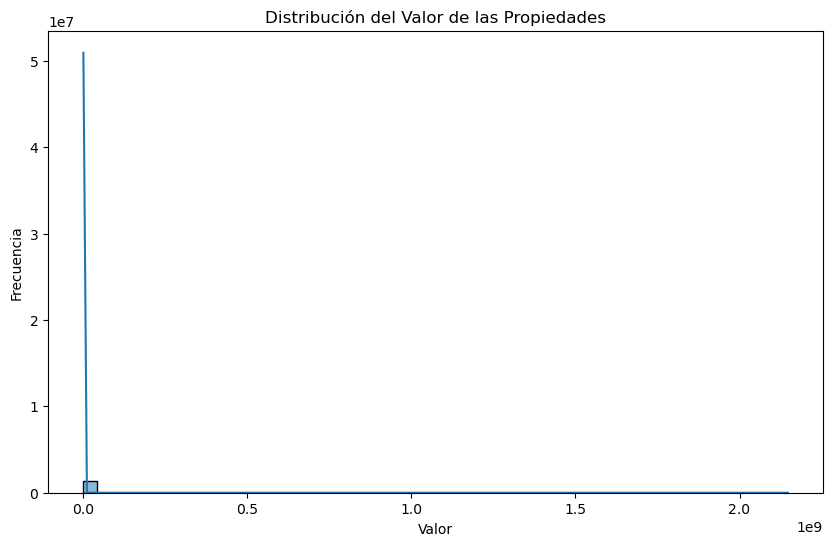

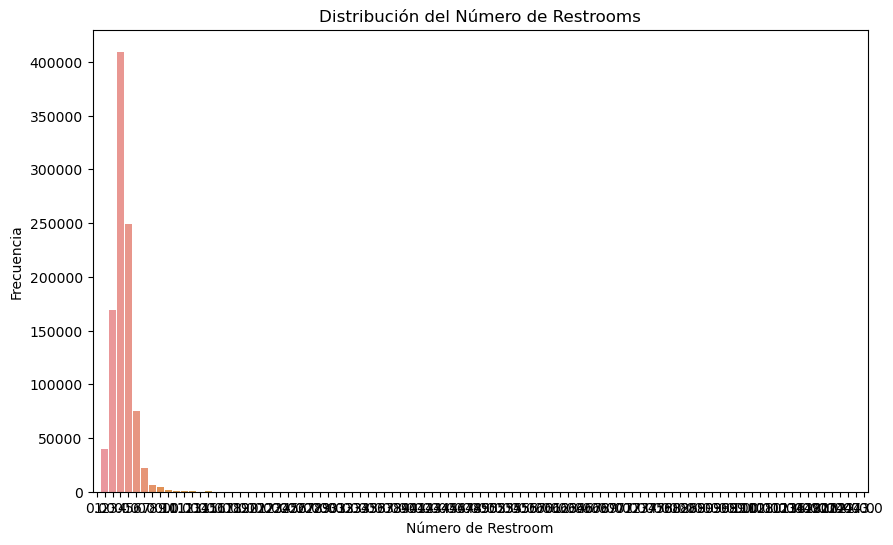

In [11]:
# Visualización de la distribución del valor de las propiedades
plt.figure(figsize=(10, 6))
sns.histplot(df_usa['price'], bins=50, kde=True)
plt.title('Distribución del Valor de las Propiedades')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de habitaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='bed', data=df_usa)
plt.title('Distribución del Número de Restrooms')
plt.xlabel('Número de Restroom')
plt.ylabel('Frecuencia')
plt.show()

In [12]:

# Aplicar la función al DataFrame
df_usa_clean = limpiar_datos(df_usa)

# Mostrar las primeras filas del DataFrame limpio
print(df_usa_clean.head())

      price  bed  bath  size(feet)        state  id
0  105000.0  3.0   2.0       920.0  Puerto Rico   0
1   80000.0  4.0   2.0      1527.0  Puerto Rico   1
2   67000.0  2.0   1.0       748.0  Puerto Rico   2
3  145000.0  4.0   2.0      1800.0  Puerto Rico   3
5  179000.0  4.0   3.0      2520.0  Puerto Rico   5


price         0
bed           0
bath          0
size(feet)    0
state         0
id            0
dtype: int64
              price            bed           bath    size(feet)            id
count  9.092580e+05  909258.000000  909258.000000  9.092580e+05  9.092580e+05
mean   6.349721e+05       3.318567       2.580093  2.147009e+03  7.111332e+05
std    2.885821e+06       1.557444       1.547605  4.962374e+03  4.060730e+05
min    0.000000e+00       1.000000       0.000000  4.000000e+00  0.000000e+00
25%    2.390000e+05       3.000000       2.000000  1.328000e+03  3.674135e+05
50%    3.800000e+05       3.000000       2.000000  1.805000e+03  7.210970e+05
75%    6.240000e+05       4.000000       3.000000  2.506000e+03  1.066947e+06
max    2.147484e+09     444.000000     460.000000  1.560780e+06  1.391305e+06


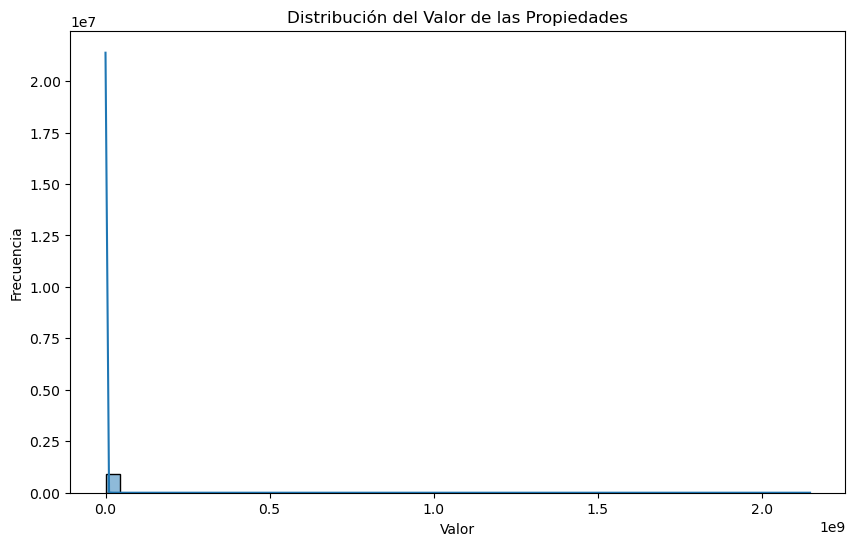

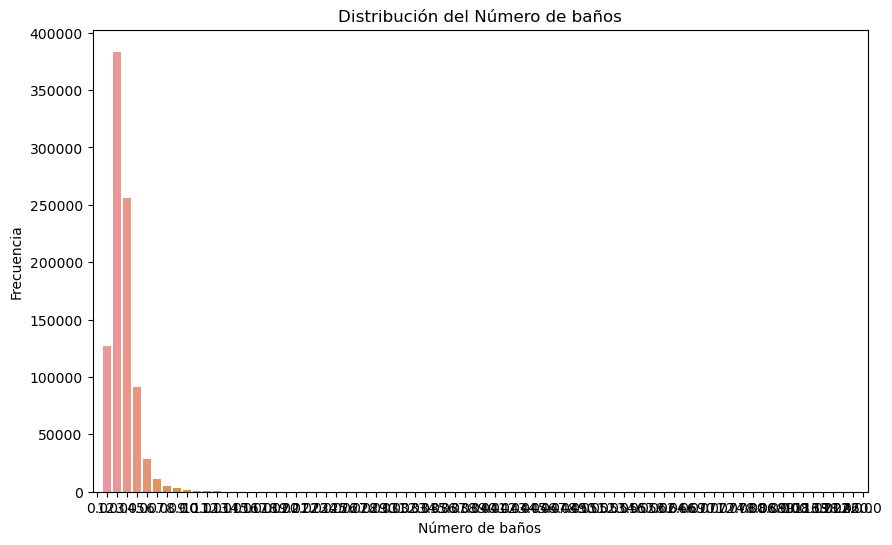

In [14]:
# Verificar si hay otros valores faltantes
print(df_usa_clean.isnull().sum())

# Estadísticas descriptivas
print(df_usa_clean.describe())

# Visualización de la distribución del valor de las propiedades
plt.figure(figsize=(10, 6))
sns.histplot(df_usa_clean['price'], bins=50, kde=True)
plt.title('Distribución del Valor de las Propiedades')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de habitaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='bath', data=df_usa_clean)
plt.title('Distribución del Número de baños')
plt.xlabel('Número de baños')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
df_usa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909258 entries, 0 to 1391305
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       909258 non-null  float64
 1   bed         909258 non-null  float64
 2   bath        909258 non-null  float64
 3   size(feet)  909258 non-null  float64
 4   state       909258 non-null  object 
 5   id          909258 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 48.6+ MB


In [16]:
verificacion(df_usa_clean)

Valores nulos por columna:
price         0
bed           0
bath          0
size(feet)    0
state         0
id            0
dtype: int64


Conteo de valores únicos por columna:
Columna 'price': 67286 valores únicos
Valores únicos en 'price':


Columna 'bed': 85 valores únicos
Valores únicos en 'bed':


Columna 'bath': 78 valores únicos
Valores únicos en 'bath':


Columna 'size(feet)': 11013 valores únicos
Valores únicos en 'size(feet)':


Columna 'state': 55 valores únicos
Valores únicos en 'state':


Columna 'id': 909258 valores únicos
Valores únicos en 'id':



Tipos de datos por columna:
Columna 'price': float64
Columna 'bed': float64
Columna 'bath': float64
Columna 'size(feet)': float64
Columna 'state': object
Columna 'id': int64

Verificando inconsistencias en la columna 'state':
Valores NaN por columna:
Empty DataFrame
Columns: [price, bed, bath, size(feet), state, id]
Index: []




In [17]:
df_usa_clean.to_csv('../data/usa_clean.csv', index=False, sep=';')